## Task-D: Collinear features and their effect on linear models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignments/10.linear_models/task_d.csv')

In [ ]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
X.shape,Y.shape

((100, 7), (100,))

###Task1

####step1

In [ ]:
cor = np.corrcoef(X,rowvar=False)
cor.shape

(7, 7)

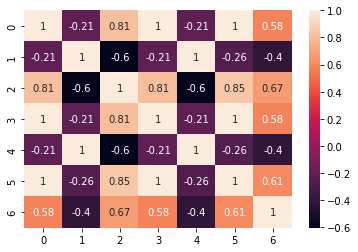

In [ ]:
sns.heatmap(cor,annot=True)

####step2

In [ ]:
clf = SGDClassifier(loss='log')

params = {'alpha':np.logspace(1,100,num = 10)}
grid_search = GridSearchCV(clf,params)
grid_search.fit(X,Y)

grid_search.best_params_

{'alpha': 10.0}

####step3

In [ ]:
best_model = SGDClassifier(loss='log',alpha = 10.0,random_state=1)
best_model.fit(X,Y)
print('Best model accuray',best_model.score(X,Y))
best_model_accuracy = best_model.score(X,Y)
print('best model weights',best_model.coef_)
best_model_weights = best_model.coef_

Best model accuray 0.64
best model weights [[ 0.03236913 -0.03147455  0.04398744  0.03193138 -0.03147455  0.03404924
   0.02864714]]


####step4

In [ ]:
noise = np.random.randint(0,10,X.shape)/100
new_X = X+noise
best_model.fit(new_X,Y)
best_model_accuracy_edited = best_model.score(new_X,Y)
print(best_model_accuracy_edited)
best_model_weights_edited =  best_model.coef_
print(best_model_weights_edited)

0.62
[[ 0.03210025 -0.03177123  0.04365687  0.03167369 -0.03169857  0.03389276
   0.02843538]]


####step5

In [ ]:
print("Difference between accuracy ",best_model_accuracy_edited-best_model_accuracy)
print("Differenec between weights :")
print(abs((best_model_weights_edited-best_model_weights)/best_model_weights))

Difference between accuracy  -0.020000000000000018
Differenec between weights :
[[0.0083067  0.00942621 0.00751506 0.00807012 0.00711754 0.00459567
  0.00739199]]


In [ ]:
wts = abs((best_model_weights_edited-best_model_weights)/best_model_weights)
diff_wts = pd.DataFrame(wts[0].reshape(-1,1),data.drop(['target'], axis=1).columns,columns= ['diff'])
diff_wts.sort_values('diff',ascending=False)

,diff
y,0.009426
x,0.008307
x*x,0.008070
z,0.007515
w,0.007392
2*y,0.007118
2*z+3*x*x,0.004596


Top 4 features which have higher  change in weights are

x*x,

 y,
 
 2*y,

 w

###Task2

####step2

In [ ]:
linear_clf = SGDClassifier(loss='squared_error')
params = {'alpha':np.logspace(1,100,num = 10)}
grid_search = GridSearchCV(linear_clf,params)
grid_search.fit(X,Y)
grid_search.best_params_

{'alpha': 10.0}

####step3

In [ ]:
best_model = SGDClassifier(loss='squared_error',alpha = 10.0,random_state=1)
best_model.fit(X,Y)
print('Best model accuray',best_model.score(X,Y))
best_model_accuracy = best_model.score(X,Y)
print('best model weights',best_model.coef_)
best_model_weights = best_model.coef_

Best model accuray 0.59
best model weights [[ 0.04803879 -0.04985978  0.06910478  0.04714953 -0.04985978  0.05077818
   0.04271637]]


####step4

In [ ]:
noise = np.random.randint(0,10,X.shape)/100
new_X = X+noise
best_model.fit(new_X,Y)
best_model_accuracy_edited = best_model.score(new_X,Y)
print(best_model_accuracy_edited)
best_model_weights_edited =  best_model.coef_
print(best_model_weights_edited)

0.58
[[ 0.04673626 -0.05135966  0.06798438  0.04583002 -0.05136565  0.05002989
   0.04131157]]


####step5

In [ ]:
print("Difference between accuracy ",best_model_accuracy_edited-best_model_accuracy)
print("Differenec between weights :")
print(abs((best_model_weights_edited-best_model_weights)/best_model_weights))

Difference between accuracy  -0.010000000000000009
Differenec between weights :
[[0.02711411 0.03008198 0.01621312 0.02798559 0.03020207 0.0147366
  0.0328868 ]]


In [ ]:
wts = abs((best_model_weights_edited-best_model_weights)/best_model_weights)
diff_wts = pd.DataFrame(wts[0].reshape(-1,1),data.drop(['target'], axis=1).columns,columns= ['diff'])
diff_wts.sort_values('diff',ascending=False)

,diff
w,0.032887
2*y,0.030202
y,0.030082
x*x,0.027986
x,0.027114
z,0.016213
2*z+3*x*x,0.014737


Top 4 features which have higher  change in weights are

2*y

y

2**z+3*x*x

x*x

w

z

x